In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import seaborn as sns

In [20]:
warnings.filterwarnings("ignore", module="scipy")
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
dosya_yolu = 'Skin_NonSkin.txt'

In [22]:
df = pd.read_csv(dosya_yolu, sep='\t', header=None)
df.columns = ["B", "R", "G", "y"]

In [23]:
print(df.head())

    B   R    G  y
0  74  85  123  1
1  73  84  122  1
2  72  83  121  1
3  70  81  119  1
4  70  81  119  1


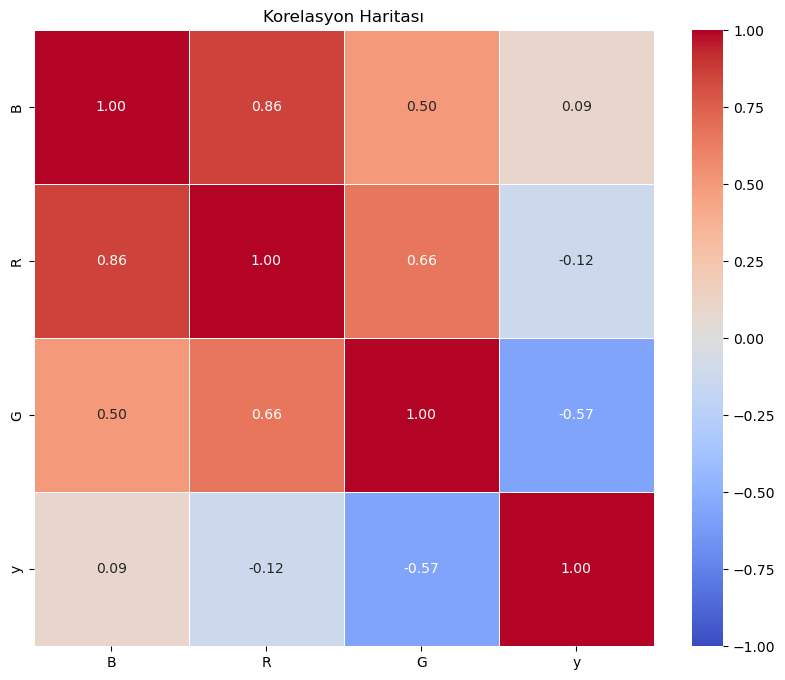

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasyon Haritası')
plt.show()

In [25]:
df.shape

(245057, 4)

In [26]:
df.isnull().sum()

B    0
R    0
G    0
y    0
dtype: int64

In [27]:
df['y'].value_counts()

2    194198
1     50859
Name: y, dtype: int64

In [28]:
df['y'].value_counts().sum()

245057

In [29]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
B,245057.0,125.065446,62.255653,0.0,68.0,139.0,176.0,255.0
R,245057.0,132.507327,59.941197,0.0,87.0,153.0,177.0,255.0
G,245057.0,123.177151,72.562165,0.0,70.0,128.0,164.0,255.0
y,245057.0,1.792461,0.405546,1.0,2.0,2.0,2.0,2.0


In [30]:
y= df["y"]
X = df[["B", "G", "R"]]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

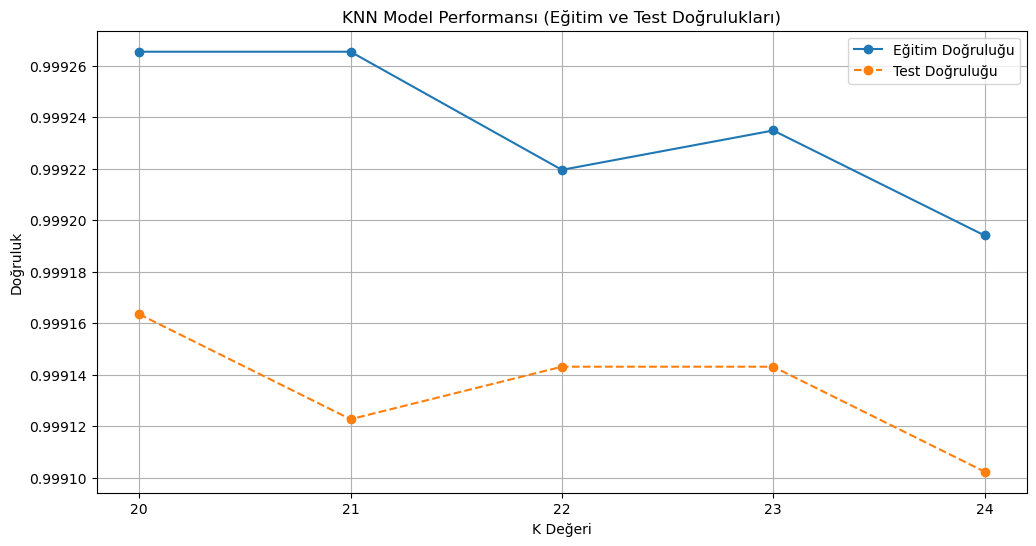

In [32]:
k_values = [i for i in range(20, 25)]


train_accuracies = []
test_accuracies = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Eğitim Doğruluğu')
plt.plot(k_values, test_accuracies, marker='o', label='Test Doğruluğu', linestyle='--')
plt.xlabel('K Değeri')
plt.ylabel('Doğruluk')
plt.xticks(k_values)
plt.grid(True)
plt.title('KNN Model Performansı (Eğitim ve Test Doğrulukları)')
plt.legend()
plt.show()

In [33]:
#pipeline

In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=14))])


In [35]:
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.9992450828368563
[[10035     0]
 [   37 38940]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10035
           2       1.00      1.00      1.00     38977

    accuracy                           1.00     49012
   macro avg       1.00      1.00      1.00     49012
weighted avg       1.00      1.00      1.00     49012

